In [2]:
pip install ucimlrepo

In [5]:
# Imports & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import os

# Configure visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# Data Acquisition
# We check if local data exists, otherwise we fetch it
data_dir = "/content/data/raw/"
data_file_path = os.path.join(data_dir, "heart_disease.csv")

# Ensure the directory exists
os.makedirs(data_dir, exist_ok=True)

if os.path.exists(data_file_path):
    print("Loading data from local storage...")
    df = pd.read_csv(data_file_path)
else:
    print("Fetching data from UCI Repository...")
    heart_disease = fetch_ucirepo(id=45)
    X = heart_disease.data.features
    y = heart_disease.data.targets

    # Combine features and target
    df = pd.concat([X, y], axis=1)

    # Save for reproducibility
    df.to_csv(data_file_path, index=False)
    print(f"Data saved to {data_file_path}")

# Display first 5 rows
df.head()

Fetching data from UCI Repository...
Data saved to /content/data/raw/heart_disease.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [8]:
# Data Cleaning & Target Engineering
# The UCI dataset 'num' column ranges from 0-4.
# 0 = No Disease, 1-4 = Various degrees of Heart Disease.
# We convert this to a binary classification problem (0 vs 1).

print("Original Target Distribution:\n", df['num'].value_counts())

# Create Binary Target
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop the original 'num' column
df = df.drop(columns=['num'])

print("\nBinary Target Distribution:\n", df['target'].value_counts(normalize=True))

Original Target Distribution:
 num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Binary Target Distribution:
 target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


ca      4
thal    2
dtype: int64


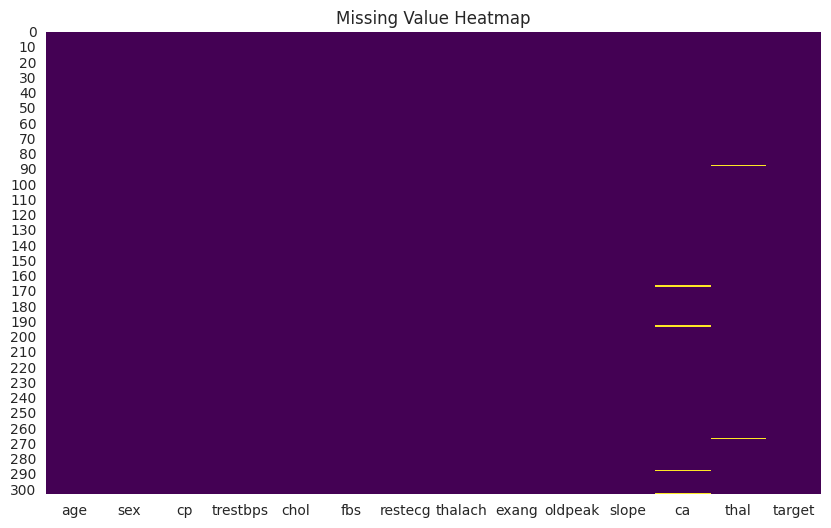

In [9]:
# Missing Value Analysis
# Check for nulls
missing_vals = df.isnull().sum()
print(missing_vals[missing_vals > 0])

# Visualization of missingness
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# NOTE: 'ca' and 'thal' have missing values.
# Strategy: We will impute these later in the pipeline (Median/Mode).

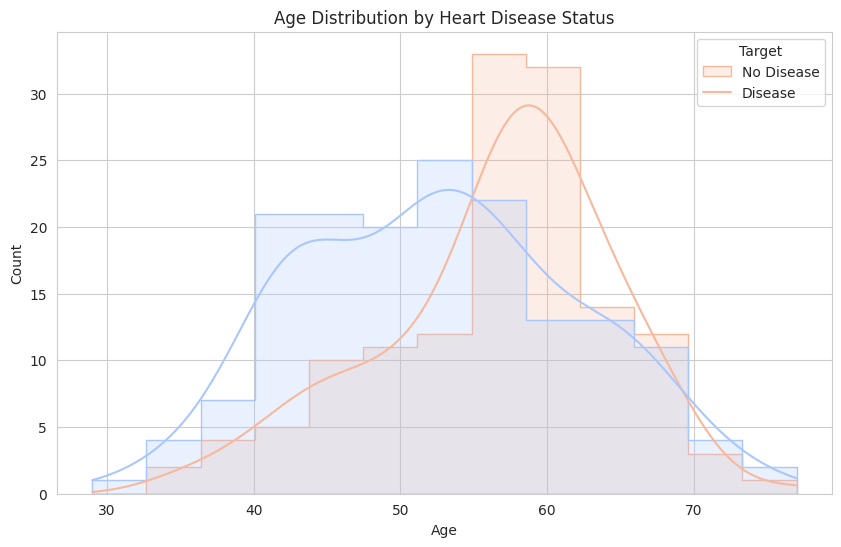

In [10]:
# Univariate Analysis - Age & Heart Disease
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='target', kde=True, element="step", palette='coolwarm')
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

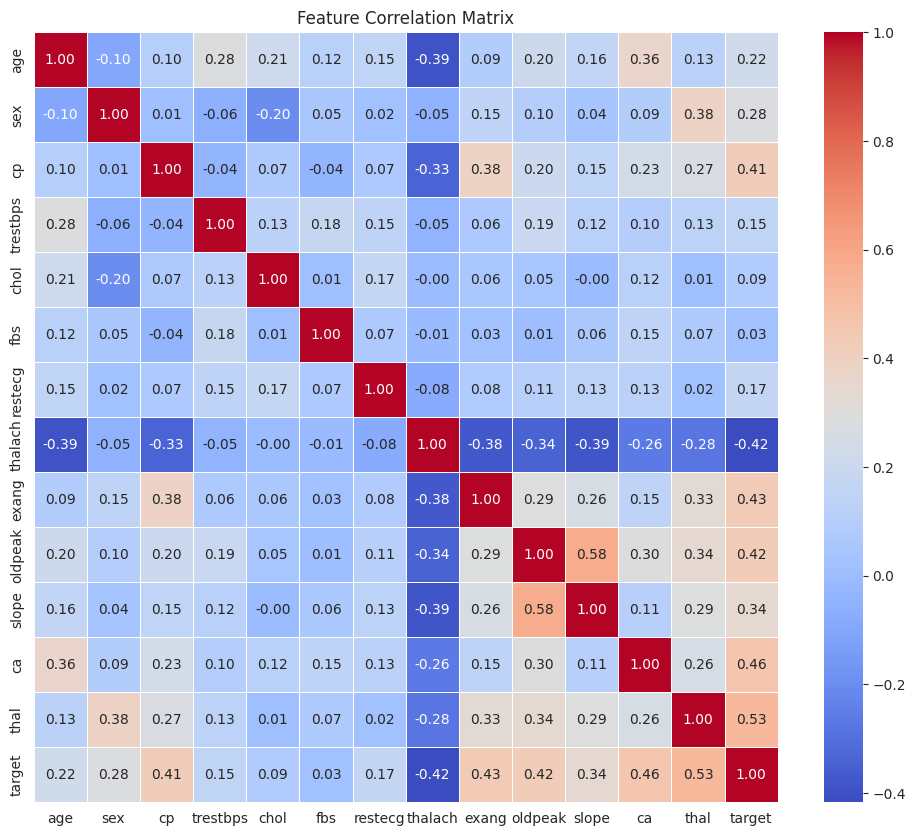

In [11]:
# Multivariate Analysis - Correlation Matrix
# We calculate correlation to see which features impact the target most
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Observation: 'thalach' (max heart rate) is negatively correlated,
# while 'oldpeak' and 'ca' are positively correlated with disease.

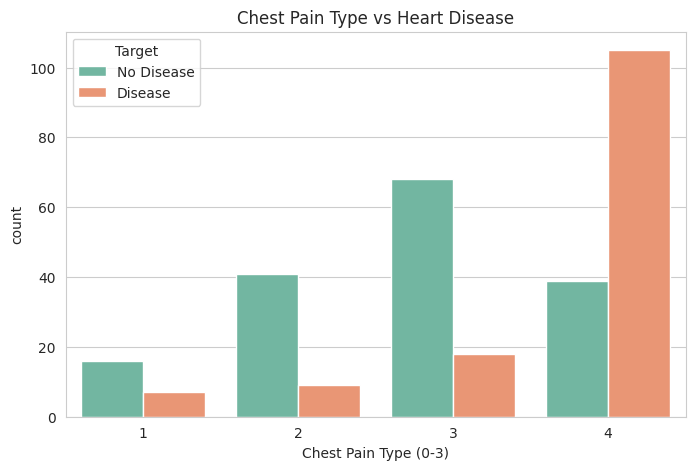

In [12]:
# Categorical Feature Analysis
# Visualizing Chest Pain Type (cp) vs Target
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cp', hue='target', palette='Set2')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()